In [93]:
import numpy as np
import pandas as pd
import re
import os
from pandas.plotting import scatter_matrix

get_ipython().magic(u'env OMP_NUM_THREADS=2')

from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt

#get_ipython().magic(u'matplotlib')
#get_ipython().magic(u'matplotlib inline')

# Set the ransom seed used for the whole program to allow reprocibility
np.random.seed(3214412)

from scipy.stats import pearsonr

env: OMP_NUM_THREADS=2


In [83]:
data_dir = '../data/raw'
train_filename = os.path.join(data_dir, 'train.csv')

In [84]:
train_df = pd.read_csv(train_filename)

# Training set

In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
train_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

# Column Analysis

## PassengerId
1 value per line as the id of the passenger.

In [107]:
print('Number of unique values: {}'.format(train_df.PassengerId.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.PassengerId)[0]))
print('Count of nans: {}'.format(train_df.PassengerId.isnull().sum()))

Number of unique values: 891
Correlation with Survived: -0.00500666076707
Count of nans: 0


## Survived
Dependent variable of 0 as deceased and 1 as survived

In [120]:
print('Number of unique values: {}'.format(train_df.Survived.nunique()))
print('Count of each value\n{}'.format(train_df.Survived.value_counts()))
print('Count of nans: {}'.format(train_df.Survived.isnull().sum()))

Number of unique values: 2
Count of each value
0    549
1    342
Name: Survived, dtype: int64
Count of nans: 0


## Pclass
3 class of passengers.  

The lower the class, the more likely the person died.

In [121]:
print('Number of unique values: {}'.format(train_df.Pclass.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Pclass)[0]))
print('Count of each value\n{}'.format(train_df.Pclass.value_counts()))
print('Count of nans: {}'.format(train_df.Pclass.isnull().sum()))

Number of unique values: 3
Correlation with Survived: -0.338481035961
Count of each value
3    491
1    216
2    184
Name: Pclass, dtype: int64
Count of nans: 0


## Name
String names of passengers.

In [122]:
print('Number of unique values: {}'.format(train_df.Name.nunique()))
print('First 5 values\n{}'.format('\n'.join(train_df.Name[:5])))
print('Count of nans: {}'.format(train_df.Name.isnull().sum()))

Number of unique values: 891
First 5 values
Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Count of nans: 0


## Sex
male or female.

Males are more likely to perish.

In [123]:
print('Number of unique values: {}'.format(train_df.Sex.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Sex == 'male')[0]))
print('Count of each value\n{}'.format(train_df.Sex.value_counts()))
print('Count of nans: {}'.format(train_df.Sex.isnull().sum()))

Number of unique values: 2
Correlation with Survived: -0.543351380658
Count of each value
male      577
female    314
Name: Sex, dtype: int64
Count of nans: 0


## Age
Has lots of null values, and is very wealkly correlated with Survival

In [192]:
age_df = train_df[['Survived', 'Age']].dropna()  # use to calculate correlation
print('Number of unique values: {}'.format(train_df.Age.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(age_df['Survived'], age_df.Age)[0]))
print('Null Age Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Age.isnull())[0]))
print('Count of nans: {}'.format(train_df.Age.isnull().sum()))

Number of unique values: 88
Correlation with Survived: -0.0772210945722
Null Age Correlation with Survived: -0.0921965232422
Count of nans: 177


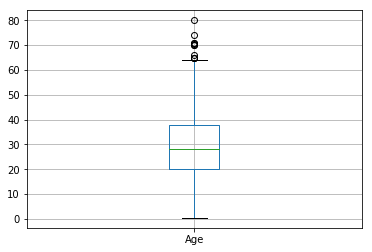

In [9]:
train_df.boxplot(column='Age');

## SibSp
Weakly correlated with Survival

In [126]:
print('Number of unique values: {}'.format(train_df.SibSp.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.SibSp)[0]))
print('Count of each value\n{}'.format(train_df.SibSp.value_counts()))
print('Count of nans: {}'.format(train_df.SibSp.isnull().sum()))

Number of unique values: 7
Correlation with Survived: -0.0353224988857
Count of each value
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Count of nans: 0


## Parch
Weakly Correlated with Survival

In [127]:
print('Number of unique values: {}'.format(train_df.Parch.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Parch)[0]))
print('Count of each value\n{}'.format(train_df.Parch.value_counts()))
print('Count of nans: {}'.format(train_df.Parch.isnull().sum()))

Number of unique values: 7
Correlation with Survived: 0.0816294070835
Count of each value
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Count of nans: 0


## Ticket
Needs some cleaning as the ticket numbers are mixed with strings.

Weakly correlated with Survival

In [158]:
print('Number of unique values: {}'.format(train_df.Ticket.nunique()))
print('First 5 values\n{}'.format('\n'.join(train_df.Ticket[:5])))
ticket_df = pd.DataFrame.copy(train_df[['Survived', 'Ticket']])
ticket_df.Ticket = ticket_df.Ticket.apply(lambda s: s.split(' ')[-1]).str.extract('(\d+)', expand=False).astype(float)
print('Count of nans: {}'.format(ticket_df.Ticket.isnull().sum()))
ticket_df = ticket_df.dropna()
print('Correlation with Survived: {}'.format(pearsonr(ticket_df['Survived'], ticket_df.Ticket)[0]))

Number of unique values: 681
First 5 values
A/5 21171
PC 17599
STON/O2. 3101282
113803
373450
Count of nans: 4
Correlation with Survived: -0.0963999044854


## Fare
Somewhat correlated with Survival

In [161]:
print('Number of unique values: {}'.format(train_df.Fare.nunique()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Fare)[0]))
print('Count of nans: {}'.format(train_df.Fare.isnull().sum()))

Number of unique values: 248
Correlation with Survived: 0.257306522385
Count of nans: 0


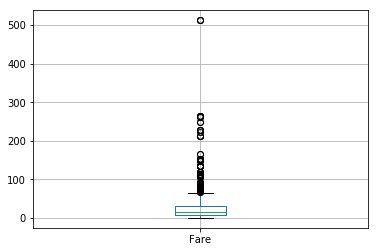

In [10]:
train_df.boxplot(column='Fare');

## Cabin
Mostly this is null

There are some indications of type of Cabin, A, B, C, D, E, F, G.  Could dummify it.

There is a correlation between the null cabins and Survival.

There is also some weak correlation between the B, C, D cabins and Survival.  Worth dummifying.

In [187]:
cabin = train_df.Cabin.astype(str)
print('Number of unique values: {}'.format(cabin.nunique()))
print('First 5 values\n{}'.format(', '.join(cabin.unique())))
print('Count of nans: {}'.format(train_df.Cabin.isnull().sum()))
print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Cabin.isnull())[0]))

for cv in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
  print('Correlation with Survived Cabin {cv}: {corr}'
        .format(cv=cv, corr=pearsonr(train_df['Survived'], cabin.str.contains(cv))[0]))

for cv in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
  print('Count of rows with {cv}: {ct}'.format(cv=cv, ct=cabin.str.contains(cv).sum()))

Number of unique values: 148
First 5 values
nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F33, F G73, E31, A5, D10 D12, D26, C110, B58 B60, E101, F E69, D47, B86, F2, C2, E33, B19, A7, C49, F4, A32, B4, B80, A31, D36, D15, C93, C78, D35, C87, B77, E67, B94, C125, C99, C118, D7, A19, B49, D, C22 C26, C106, C65, E36, C54, B57 B59 B63 B66, C7, E34, C32, B18, C124, C91, E40, T, C128, D37, B35, E50, C82, B96 B98, E10, E44, A34, C104, C111, C92, E38, D21, E12, E63, A14, B37, C30, D20, B79, E25, D46, B73, C95, B38, B39, B22, C86, C70, A16, C101, C68, A10, E68, B41, A20, D19, D50, D9, A23, B50, A26, D48, E58, C126, B71, B51 B53 B55, D49, B5, B20, F G63, C62 C64, E24, C90, C45, E8, B101, D45, C46, D30, E121, D11, E77, F38, B3, D6, B82 B84, D17, A36, B102, B69, E49, C47, D28, E17, A24, C50, B42, C148
Count of nans: 687
Correlation with Survived: -0.316911523112
Correlation with Survived Cabin A: 0.0222869538113
Correlation with Survived Cabin B: 0.17509503365

## Embarked
Some correlation between the S and C cabins and Survivied.  

Worth dummifying.

In [190]:
emb = train_df.Embarked.astype(str)

print('Number of unique values: {}'.format(train_df.Embarked.nunique()))
#print('Correlation with Survived: {}'.format(pearsonr(train_df['Survived'], train_df.Embarked)[0]))
print('Count of each value\n{}'.format(train_df.Embarked.value_counts()))
print('Count of nans: {}'.format(train_df.Embarked.isnull().sum()))

for cv in ['S', 'C', 'Q']:
  print('Correlation with Survived Cabin {cv}: {corr}'
        .format(cv=cv, corr=pearsonr(train_df['Survived'], emb.str.contains(cv))[0]))

Number of unique values: 3
Count of each value
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Count of nans: 2
Correlation with Survived Cabin S: -0.155660273404
Correlation with Survived Cabin C: 0.168240431218
Correlation with Survived Cabin Q: 0.00365038268397


# Proposed Features

## Columns to drop
1. PassengerId
2. Name
3. Age
4. SibSp
5. Parch
6. Ticket

## Columns to keep + Transformations
1. Survived (dependent variable)
2. Pclass - dummify
3. Sex - 1 if male, 0 if female
4. Fare - Normalized
5. Cabin - as 5 columns.  1 if nan, 1 each for if contains B, C, D, E
6. Embarked - dummify without nan dummy column